# Act 5.6 Neural Net Robot Navigation

    - Ángel Gabriel Esparza Espinoza - A01742534

Utilizaremos un conjunto de datos públicos del repositorio de la UCI.
El problema se relaciona con un robot capaz de seguir la pared.
Los datos se recopilaron mientras el robot SCITOS G5 recorría la habitación siguiendo la pared en sentido horario, durante cuatro rondas, utilizando 24 sensores ultrasónicos dispuestos circularmente alrededor de su cintura.

Los archivos proporcionados comprenden tres conjuntos de datos diferentes.
El primero contiene los valores brutos de las mediciones de los 24 sensores de ultrasonido y su etiqueta de clase correspondiente. Las lecturas de los sensores se muestrean a una velocidad de 9 muestras por segundo.
El segundo contiene cuatro lecturas de sensor denominadas «distancias simplificadas» y su etiqueta de clase correspondiente. Estas distancias simplificadas se denominan «distancia frontal», «distancia izquierda», «distancia derecha» y «distancia trasera». Consisten, respectivamente, en las lecturas mínimas de los sensores dentro de arcos de 60 grados ubicados en las partes delantera, izquierda, derecha y trasera del robot.
El tercero contiene únicamente las distancias simplificadas frontal e izquierda y su etiqueta de clase correspondiente.

Utilizando cualquier herramienta o plataforma de IA defina y entrene un modelo para determinar la acción a realizar por el robot dado un vector de lecturas de los sensores. 

Su reporte debe incluir un breve EDA, los detalles de su dataset y modelo asi como un análisis de resultados. Decida usted los métricos que usará y provea de una interpretación a los resultados. Formato libre, súbalo aqui como PDF. No olvide el código fuente empleado para probar. Puede ser un link a un repositorio de GitHub (preferentemente) o bien el archivo de Jupyter Notebook o Python. 

 ## EDA
 
 Para el desarrollo de esta actividad tomaré el tercer dataset en donde se tienen las distancias simplificadas frontal e izquierda.

 ### Visualización de los datos
 


In [41]:
#Visualización de los datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import GridSearchCV, StratifiedKFold, cross_val_predict
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split

df = pd.read_csv('sensor_readings_2.data', header=None, names=['front', 'left', 'class'])
#df = pd.read_csv('sensor_readings_2.data', sep=",")
print(df.head(5))

print('Cantidad de Filas y columnas:',df.shape)
print('Nombre columnas:',df.columns)

#Información de los datos
df.info()

   front   left              class
0  1.687  0.445  Slight-Right-Turn
1  1.687  0.449  Slight-Right-Turn
2  1.687  0.449  Slight-Right-Turn
3  1.687  0.449  Slight-Right-Turn
4  1.687  0.449  Slight-Right-Turn
Cantidad de Filas y columnas: (5456, 3)
Nombre columnas: Index(['front', 'left', 'class'], dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5456 entries, 0 to 5455
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   front   5456 non-null   float64
 1   left    5456 non-null   float64
 2   class   5456 non-null   object 
dtypes: float64(2), object(1)
memory usage: 128.0+ KB


### Distribución de clases


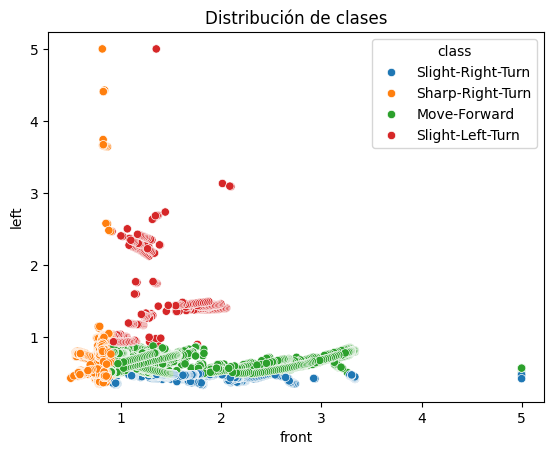

In [34]:
sns.scatterplot(data=df, x='front', y='left', hue='class')
plt.title('Distribución de clases')
plt.show()

 ### Matriz de Correlación

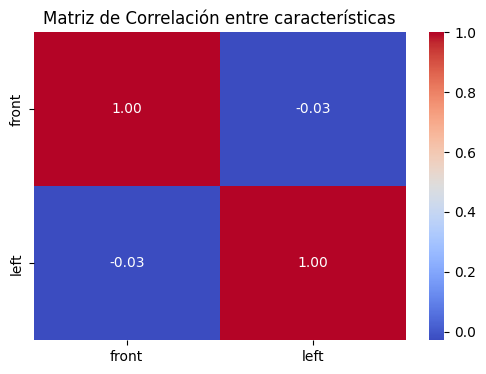

In [35]:
plt.figure(figsize=(6, 4))
corr_matrix = df[['front', 'left']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Matriz de Correlación entre características')
plt.show()

## Entrenamiento del modelo

Para este dataset se seleccionará un clasificador KNN con una k igual a 5. Además, se tomará el 30% de los datos para tomarlos como prueba y probar el funcionamiento del modelo, y el resto de los datos se utilizarán para entrenar el modelo.

In [44]:
#Separando las clases del dataset
x = df[['front', 'left']]
y = df['class']

# Model evaluation with nested CV
kf1 = StratifiedKFold(n_splits=5, shuffle = True)
kf2 = StratifiedKFold(n_splits=5, shuffle = True)

cv_y_test = []
cv_y_pred = []


X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

#Clasificador KNN con k=5
clf_cv_hyp = KNeighborsClassifier(n_neighbors=5)

#Entrenamiento del modelo
clf_cv_hyp.fit(X_train, y_train)

#Probando el modelo con los datos restantes
y_pred = clf_cv_hyp.predict(X_test)

### Matriz de Confusión

La matriz de confusión del modelo entrenado nos dice que la clase 0 (Move-Forward), se obtuvo 658 verdaderos positivos, predijo de incorrectamente como clase 1 tres veces y como clase 3 diez veces. La clase  1 (Sharp-Right-Turn) obtuvo 619 verdaderos positivos y predijo de manera incorrecta como clase 0 una vez. La clase 2 (Slight-Right-Turn) obtuvo 91 verdaderis positivos y predijo incorrectamente como clase 1 solo una vez. Y por último la clase 3 (Slight-Left-Turn) obtuvo 248 verdaderos positivos y predijo de manera incorrecta como clase 0 seis veces. 

Con esto podemos observar que todas las clases mostraro un buen comportamiento, solamente las clases 0 y 3 presentaron algunos errores menores al momento de clasificar. 


Matriz de confusión:
[[658   3   0  10]
 [  1 619   0   0]
 [  0   1  91   0]
 [  6   0   0 248]]


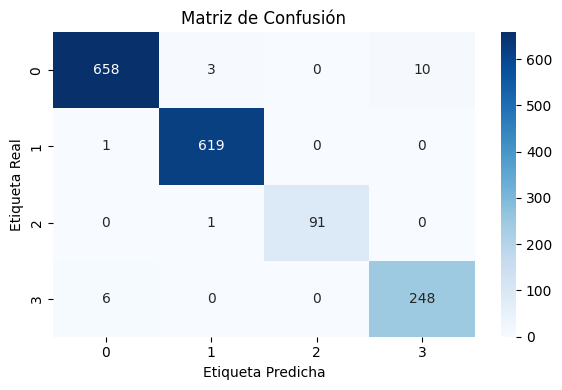

In [46]:
print("\nMatriz de confusión:")
print(confusion_matrix(y_test, y_pred))

# Visualización de la matriz de confusión
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Etiqueta Predicha')
plt.ylabel('Etiqueta Real')
plt.title('Matriz de Confusión')
plt.tight_layout()
plt.show()

### Reporte de Clasificación

En los resultados del classification report se puede observar que los resultados del modelo entrenado son muy buenos, ya que nos ofrece un recall de 0.98 o más en las etiquetas del dataset. Además, el modelo logra un accuracy de 0.99. Por lo que se puede considerar que una k=5, en esta situación es un buen parámetro para el modelo de clasificación. Por lo que se puede esperar utilizando solamente estás mediciones de 2 sensores ultrasónicos para entrenar el modelo de clasificación el robot sea capaz de tomar buenas acciones al momento de recibir datos nuevos.

In [47]:
print("\nReporte de clasificación:")
print(classification_report(y_test, y_pred))


Reporte de clasificación:
                   precision    recall  f1-score   support

     Move-Forward       0.99      0.98      0.99       671
 Sharp-Right-Turn       0.99      1.00      1.00       620
 Slight-Left-Turn       1.00      0.99      0.99        92
Slight-Right-Turn       0.96      0.98      0.97       254

         accuracy                           0.99      1637
        macro avg       0.99      0.99      0.99      1637
     weighted avg       0.99      0.99      0.99      1637

